# Deterministic funnel

**Partial Derivatives with $\rho$ Interaction**

For the utility function $U(A, B, C, D)$, the partial derivatives with the $\rho$ interaction are:

$$
\frac{\partial U}{\partial A} = B \cdot C \cdot D \cdot \left(1 + \rho_{AB} + \rho_{AC} + \rho_{AD}\right)
$$

$$
\frac{\partial U}{\partial B} = A \cdot C \cdot D \cdot \left(1 + \rho_{BA} + \rho_{BC} + \rho_{BD}\right)
$$

$$
\frac{\partial U}{\partial C} = A \cdot B \cdot D \cdot \left(1 + \rho_{CA} + \rho_{CB} + \rho_{CD}\right)
$$

$$
\frac{\partial U}{\partial D} = A \cdot B \cdot C \cdot \left(1 + \rho_{DA} + \rho_{DB} + \rho_{DC}\right)
$$

**Elasticities with $\rho$ Interaction**

For the utility function $U(A, B, C, D)$, the elasticities with the $\rho$ interaction are:

$$
\epsilon_A = \frac{\partial U}{\partial A} \cdot \frac{A}{U} = \left(B \cdot C \cdot D \cdot \left(1 + \rho_{AB} + \rho_{AC} + \rho_{AD}\right)\right) \cdot \frac{A}{A \cdot B \cdot C \cdot D} = 1 + \rho_{AB} + \rho_{AC} + \rho_{AD}
$$

$$
\epsilon_B = \frac{\partial U}{\partial B} \cdot \frac{B}{U} = \left(A \cdot C \cdot D \cdot \left(1 + \rho_{BA} + \rho_{BC} + \rho_{BD}\right)\right) \cdot \frac{B}{A \cdot B \cdot C \cdot D} = 1 + \rho_{BA} + \rho_{BC} + \rho_{BD}
$$

$$
\epsilon_C = \frac{\partial U}{\partial C} \cdot \frac{C}{U} = \left(A \cdot B \cdot D \cdot \left(1 + \rho_{CA} + \rho_{CB} + \rho_{CD}\right)\right) \cdot \frac{C}{A \cdot B \cdot C \cdot D} = 1 + \rho_{CA} + \rho_{CB} + \rho_{CD}
$$

$$
\epsilon_D = \frac{\partial U}{\partial D} \cdot \frac{D}{U} = \left(A \cdot B \cdot C \cdot \left(1 + \rho_{DA} + \rho_{DB} + \rho_{DC}\right)\right) \cdot \frac{D}{A \cdot B \cdot C \cdot D} = 1 + \rho_{DA} + \rho_{DB} + \rho_{DC}
$$

## Create fake data

In [2]:
import numpy as np
import pandas as pd

def create_fake_data():
    # Simulation parameters
    T = 52  # Number of time steps
    dt = 1/52  # Time step size (weekly steps)

    # GBM parameters for A
    mu_A = 0.5  # Drift
    sigma_A = 0.02  # Volatility
    A0 = 70000  # Initial Value

    # Geometric OU parameters for B, C, D
    theta_B, mu_B, sigma_B = 0.1, 0.04, 0.05  # Mean Reversion Speed, Long-term Mean, Volatility
    theta_C, mu_C, sigma_C = 0.1, 0.03, 0.05  # Mean Reversion Speed, Long-term Mean, Volatility
    theta_D, mu_D, sigma_D = 0.1, 260, 0.5  # Mean Reversion Speed, Long-term Mean, Volatility

    # Initialize arrays to store the simulated data
    A = np.zeros(T)
    B = np.zeros(T)
    C = np.zeros(T)
    D = np.zeros(T)
    time = np.arange(T)

    # Initial values
    A[0] = A0
    B[0] = np.log(mu_B)  # Log transform for Geometric OU
    C[0] = np.log(mu_C)  # Log transform for Geometric OU
    D[0] = np.log(mu_D)  # Log transform for Geometric OU

    # Simulate the GBM and Geometric OU processes
    for t in range(1, T):
        A[t] = A[t-1] * np.exp((mu_A - 0.5 * sigma_A**2) * dt + sigma_A * np.sqrt(dt) * np.random.normal())
        B[t] = B[t-1] + theta_B * (np.log(mu_B) - B[t-1]) * dt + sigma_B * np.sqrt(dt) * np.random.normal()
        C[t] = C[t-1] + theta_C * (np.log(mu_C) - C[t-1]) * dt + sigma_C * np.sqrt(dt) * np.random.normal()
        D[t] = D[t-1] + theta_D * (np.log(mu_D) - D[t-1]) * dt + sigma_D * np.sqrt(dt) * np.random.normal()

    # Exponentiate to get the geometric values
    B = np.exp(B)
    C = np.exp(C)
    D = np.exp(D)

    # Create a DataFrame for the simulated data
    data = pd.DataFrame({'Time': time, 'A': A, 'B': B, 'C': C, 'D': D})
    return data

# Generate the fake data
data = create_fake_data()
data

,Time,A,B,C,D
0,0,70000.000000,0.040000,0.030000,260.000000
1,1,71004.197313,0.040475,0.030126,296.393045
2,2,71351.528613,0.040126,0.030267,312.752788
3,3,72286.289031,0.039923,0.030087,332.859522
4,4,73151.889085,0.039633,0.029863,337.677167
5,5,73764.936922,0.039426,0.029689,336.456071
6,6,74363.435824,0.039392,0.029595,284.584252
7,7,74700.683476,0.039474,0.029288,263.990524
8,8,75328.974990,0.039478,0.029495,265.542577
9,9,75827.521695,0.039981,0.029493,275.092994


## Correlations

Correlation Matrix:
A:
  A: 1.0
  B: 0.82
  C: 0.39
  D: -0.31

B:
  A: 0.82
  B: 1.0
  C: 0.26
  D: -0.39

C:
  A: 0.39
  B: 0.26
  C: 1.0
  D: -0.22

D:
  A: -0.31
  B: -0.39
  C: -0.22
  D: 1.0



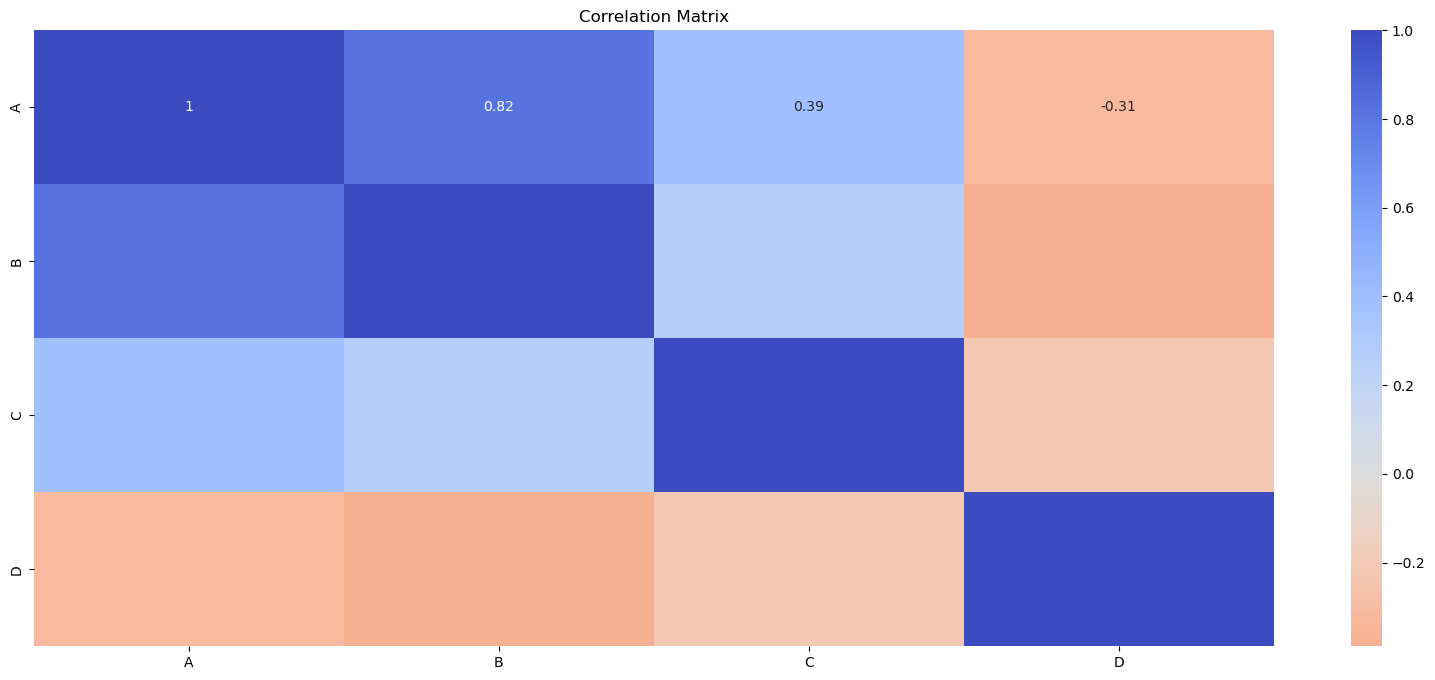

/opt/anaconda3/envs/ds/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/envs/ds/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/envs/ds/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/envs/ds/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Conver

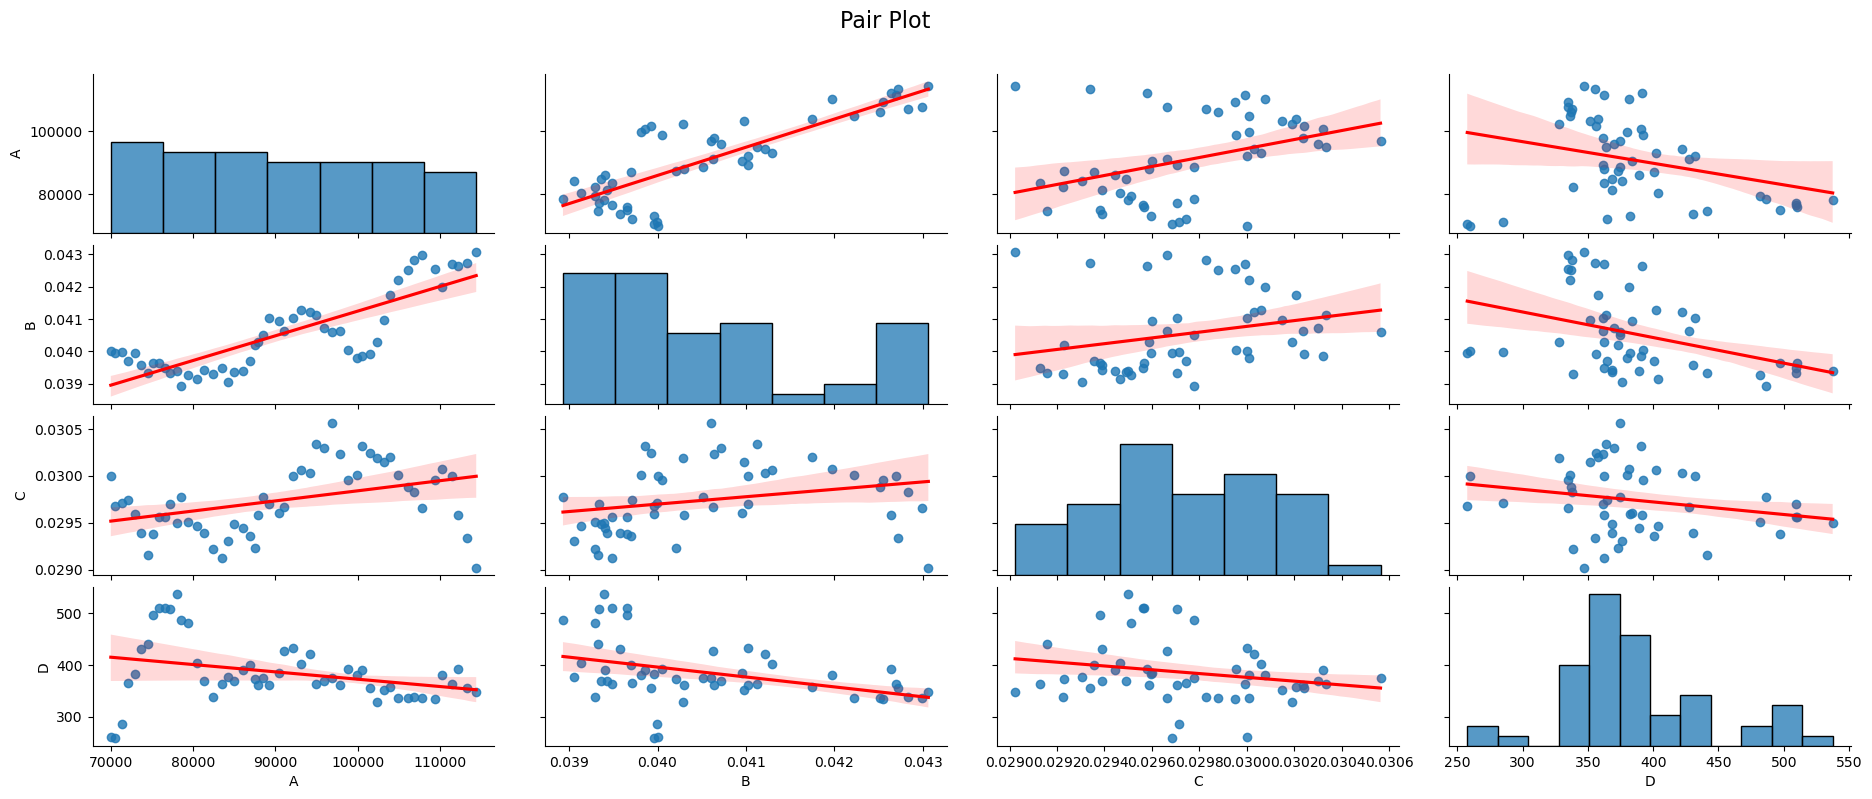


rho_data:
{'Traffic': {'Traffic': 1.0, 'FreeConversion': 0.8245073757008682, 'PaidConversion': 0.3916033868617598, 'Price': -0.311734471932274}, 'FreeConversion': {'Traffic': 0.8245073757008682, 'FreeConversion': 1.0, 'PaidConversion': 0.26486268557766346, 'Price': -0.3887543539238192}, 'PaidConversion': {'Traffic': 0.3916033868617598, 'FreeConversion': 0.26486268557766346, 'PaidConversion': 1.0, 'Price': -0.22162006835395934}, 'Price': {'Traffic': -0.311734471932274, 'FreeConversion': -0.3887543539238192, 'PaidConversion': -0.22162006835395934, 'Price': 1.0}}


In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

def format_corr_dict(corr_dict):
    formatted_dict = {}
    for key, value in corr_dict.items():
        formatted_dict[key] = {k: round(v, 2) for k, v in value.items()}
    return formatted_dict

def print_corr_dict(corr_dict):
    formatted_dict = format_corr_dict(corr_dict)
    for key, value in formatted_dict.items():
        print(f"{key}:")
        for sub_key, sub_value in value.items():
            print(f"  {sub_key}: {sub_value}")
        print()

def format_percentage_axes(ax, variables):
    for var in variables:
        if ax.get_xlim()[0] == 0 and ax.get_xlim()[1] <= 1:
            ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: '{:.0%}'.format(x)))
        if ax.get_ylim()[0] == 0 and ax.get_ylim()[1] <= 1:
            ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: '{:.0%}'.format(y)))

def correlations(data):
    # Drop the 'Time' column if it exists
    if 'Time' in data.columns:
        data = data.drop(columns=['Time'])
    
    # Compute the correlation matrix
    corr_matrix = data.corr()
    
    # Convert the correlation matrix to a dictionary
    corr_dict = corr_matrix.to_dict()
    
    # Print the correlation matrix in a readable format
    print("Correlation Matrix:")
    print_corr_dict(corr_dict)
    
    # Plot the correlation matrix
    plt.figure(figsize=(20, 8))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm_r', center=0, cbar=True)
    plt.title('Correlation Matrix')
    plt.show()
    
    # Create pair plot with linear regression lines
    pair_plot = sns.pairplot(data, kind='reg', plot_kws={'line_kws':{'color':'red'}})
    pair_plot.fig.set_size_inches(20, 8)
    pair_plot.fig.subplots_adjust(top=0.9)  # adjust the Figure in pair_plot
    pair_plot.fig.suptitle('Pair Plot', fontsize=16)
    
    # Format axes if range is between 0 and 1
    for ax in pair_plot.axes.flatten():
        if ax is not None:
            format_percentage_axes(ax, data.columns)

    plt.show()
    
    # Map variables to Traffic, FreeConversion, PaidConversion, Price
    variable_mapping = {'A': 'Traffic', 'B': 'FreeConversion', 'C': 'PaidConversion', 'D': 'Price'}
    reverse_mapping = {v: k for k, v in variable_mapping.items()}
    rho_data = {variable_mapping[k]: {variable_mapping[sub_k]: v for sub_k, v in sub_v.items()} for k, sub_v in corr_dict.items() if k in variable_mapping}

    # Return the rho_data object
    return rho_data

# Example usage with the generated data
data = create_fake_data()
rho_data = correlations(data)
print("\nrho_data:")
print(rho_data)

## Analysis

Total Sensitivity with respect to Traffic: $0
Total Sensitivity with respect to Free Conversion: $1,989,720
Total Sensitivity with respect to Paid Conversion: $1,119,180
Total Sensitivity with respect to Price: $7

Elasticity with respect to Traffic: 1.9
Elasticity with respect to Free Conversion: 1.7
Elasticity with respect to Paid Conversion: 1.4
Elasticity with respect to Price: 0.1


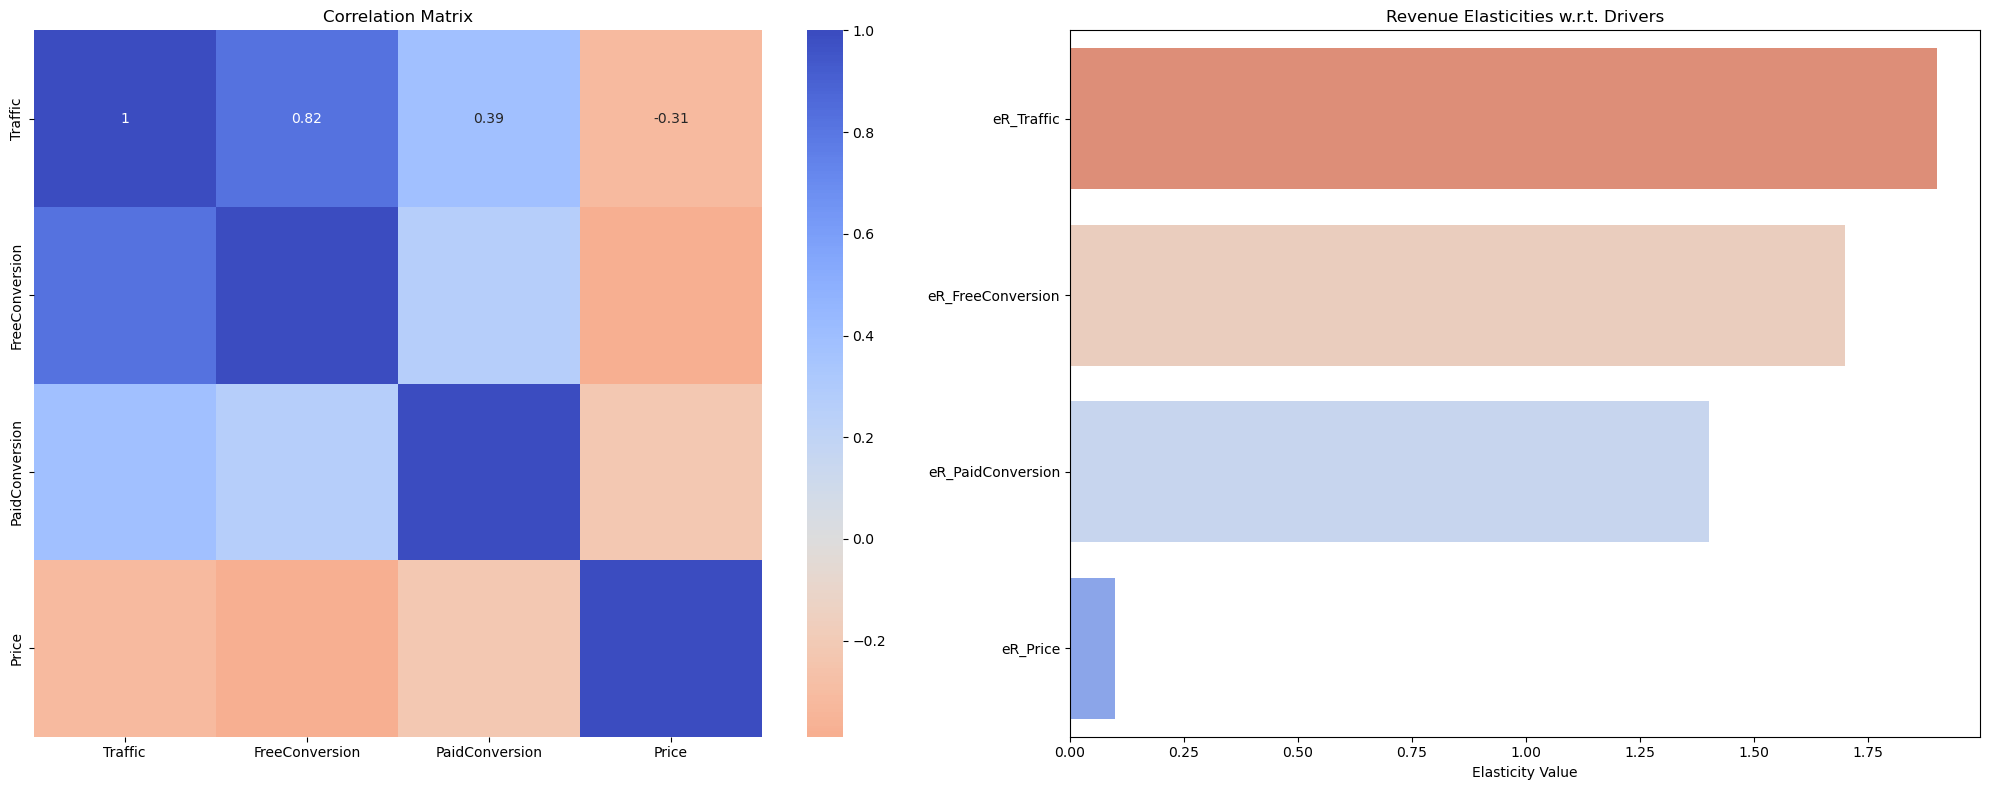

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

def calculate_total_sensitivity_and_elasticity(traffic, free_conversion, paid_conversion, price, rho):
    """
    Calculate total sensitivity and elasticity of R with respect to traffic, free_conversion, paid_conversion, and price
    considering their Pearson correlation coefficients.
    
    Parameters:
    traffic (float): Value of traffic
    free_conversion (float): Value of free_conversion
    paid_conversion (float): Value of paid_conversion
    price (float): Value of price
    rho (pd.DataFrame): DataFrame of Pearson correlation coefficients
    
    Returns:
    dict: Total sensitivities and elasticities of R with respect to traffic, free_conversion, paid_conversion, and price
    """
    # Calculate partial derivatives (sensitivities)
    dR_dTraffic = free_conversion * paid_conversion * price * (1 + rho.loc['Traffic', 'FreeConversion'] + rho.loc['Traffic', 'PaidConversion'] + rho.loc['Traffic', 'Price'])
    dR_dFreeConversion = traffic * paid_conversion * price * (1 + rho.loc['FreeConversion', 'Traffic'] + rho.loc['FreeConversion', 'PaidConversion'] + rho.loc['FreeConversion', 'Price'])
    dR_dPaidConversion = traffic * free_conversion * price * (1 + rho.loc['PaidConversion', 'Traffic'] + rho.loc['PaidConversion', 'FreeConversion'] + rho.loc['PaidConversion', 'Price'])
    dR_dPrice = traffic * free_conversion * paid_conversion * (1 + rho.loc['Price', 'Traffic'] + rho.loc['Price', 'FreeConversion'] + rho.loc['Price', 'PaidConversion'])
    
    # Calculate R
    R = traffic * free_conversion * paid_conversion * price
    
    # Calculate elasticities
    eR_Traffic = (dR_dTraffic * traffic) / R
    eR_FreeConversion = (dR_dFreeConversion * free_conversion) / R
    eR_PaidConversion = (dR_dPaidConversion * paid_conversion) / R
    eR_Price = (dR_dPrice * price) / R
    
    return {
        'sensitivities': {
            'dR_dTraffic': round(dR_dTraffic),
            'dR_dFreeConversion': round(dR_dFreeConversion),
            'dR_dPaidConversion': round(dR_dPaidConversion),
            'dR_dPrice': round(dR_dPrice)
        },
        'elasticities': {
            'eR_Traffic': round(eR_Traffic, 1),
            'eR_FreeConversion': round(eR_FreeConversion, 1),
            'eR_PaidConversion': round(eR_PaidConversion, 1),
            'eR_Price': round(eR_Price, 1)
        }
    }

# Example values
traffic = 150000
free_conversion = 0.02
paid_conversion = 0.03
price = 260

# Pearson correlation coefficients
'''No interaction'''''
# rho_data = {
#     'Traffic': {'Traffic': 1, 'FreeConversion': 0, 'PaidConversion': 0, 'Price': 0},
#     'FreeConversion': {'Traffic': 0, 'FreeConversion': 1, 'PaidConversion': 0, 'Price': 0},
#     'PaidConversion': {'Traffic': 0, 'FreeConversion': 0, 'PaidConversion': 1, 'Price': 0},
#     'Price': {'Traffic': 0, 'FreeConversion': 0, 'PaidConversion': 0, 'Price': 1}
# }



rho = pd.DataFrame(rho_data)

# Calculate total sensitivities and elasticities
results = calculate_total_sensitivity_and_elasticity(traffic, free_conversion, paid_conversion, price, rho)

# Print the results with formatting
print("Total Sensitivity with respect to Traffic: ${:,}".format(results['sensitivities']['dR_dTraffic']))
print("Total Sensitivity with respect to Free Conversion: ${:,}".format(results['sensitivities']['dR_dFreeConversion']))
print("Total Sensitivity with respect to Paid Conversion: ${:,}".format(results['sensitivities']['dR_dPaidConversion']))
print("Total Sensitivity with respect to Price: ${:,}".format(results['sensitivities']['dR_dPrice']))

print()

print("Elasticity with respect to Traffic: {:.1f}".format(results['elasticities']['eR_Traffic']))
print("Elasticity with respect to Free Conversion: {:.1f}".format(results['elasticities']['eR_FreeConversion']))
print("Elasticity with respect to Paid Conversion: {:.1f}".format(results['elasticities']['eR_PaidConversion']))
print("Elasticity with respect to Price: {:.1f}".format(results['elasticities']['eR_Price']))

# Ensure the correlation matrix is symmetrical
for var1 in rho.columns:
    for var2 in rho.index:
        rho.loc[var1, var2] = rho.loc[var2, var1]

# Plot the correlation matrix and elasticities
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

# Correlation matrix
sns.heatmap(rho, annot=True, cmap='coolwarm_r', center=0, cbar=True, ax=axes[0])
axes[0].set_title('Correlation Matrix')

# Elasticities
elasticities = pd.Series(results['elasticities']).sort_values(ascending=False)
sns.barplot(x=elasticities.values, y=elasticities.index, palette='coolwarm_r', ax=axes[1])
axes[1].set_title('Revenue Elasticities w.r.t. Drivers')
axes[1].set_xlabel('Elasticity Value')

plt.tight_layout()
plt.show()